# Accessing R from Google Cloud Datalab

[iPython/Juypter](http://ipython.org/) versus [R](https://www.r-project.org/), that old chestnut.  It's all about preference.  I have to admit I prefer iPython and I really like [Google Cloud Datalab](https://cloud.google.com/datalab/) because it's fully managed and I spend my time writing code...  However, R has some really useful libraries, especially for financial analysis, so I love the idea of accessing R on demand from iPython using [rpy2](http://rpy.sourceforge.net/).  Here's my take on making that happen in Datalab.

First, make some assumptions about the VM running Datalab, then use those to make some updates in preparation for installing R and rpy2.

In [69]:
!if [ `grep 'cran' /etc/apt/sources.list | wc -l` = 0 ]; then echo "deb http://cran.rstudio.com/bin/linux/debian lenny-cran/" >> /etc/apt/sources.list; fi
!apt-key adv --keyserver keyserver.ubuntu.com --recv-keys E084DAB9

Executing: gpg --ignore-time-conflict --no-options --no-default-keyring --homedir /tmp/tmp.J52iQAFZ3h --no-auto-check-trustdb --trust-model always --keyring /etc/apt/trusted.gpg --primary-keyring /etc/apt/trusted.gpg --keyring /etc/apt/trusted.gpg.d/debian-archive-jessie-automatic.gpg --keyring /etc/apt/trusted.gpg.d/debian-archive-jessie-security-automatic.gpg --keyring /etc/apt/trusted.gpg.d/debian-archive-jessie-stable.gpg --keyring /etc/apt/trusted.gpg.d/debian-archive-squeeze-automatic.gpg --keyring /etc/apt/trusted.gpg.d/debian-archive-squeeze-stable.gpg --keyring /etc/apt/trusted.gpg.d/debian-archive-wheezy-automatic.gpg --keyring /etc/apt/trusted.gpg.d/debian-archive-wheezy-stable.gpg --keyserver keyserver.ubuntu.com --recv-keys E084DAB9
gpg: requesting key E084DAB9 from hkp server keyserver.ubuntu.com
gpg: key E084DAB9: "Michael Rutter <marutter@gmail.com>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1


Second, install R.

In [70]:
!apt-get install -y r-base r-base-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
r-base is already the newest version.
r-base-dev is already the newest version.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.


Third, install rpy2.

In [71]:
!pip install rpy2

Cleaning up...


Fourth, and last, activate the R cell magic.

In [72]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Now we're ready to start accessing R from Datalab.

We'll do something simple just to show the plumbing is in place...

In [73]:
import rpy2.interactive as r
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector

Install ggplot2 if required.

In [74]:
if not rpackages.isinstalled('ggplot2'):
  utils = rpackages.importr('utils')
  utils.chooseCRANmirror(ind=99)
  utils.install_packages(StrVector('ggplot2'))

In [75]:
%%R
library(ggplot2)
head(mtcars)

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1


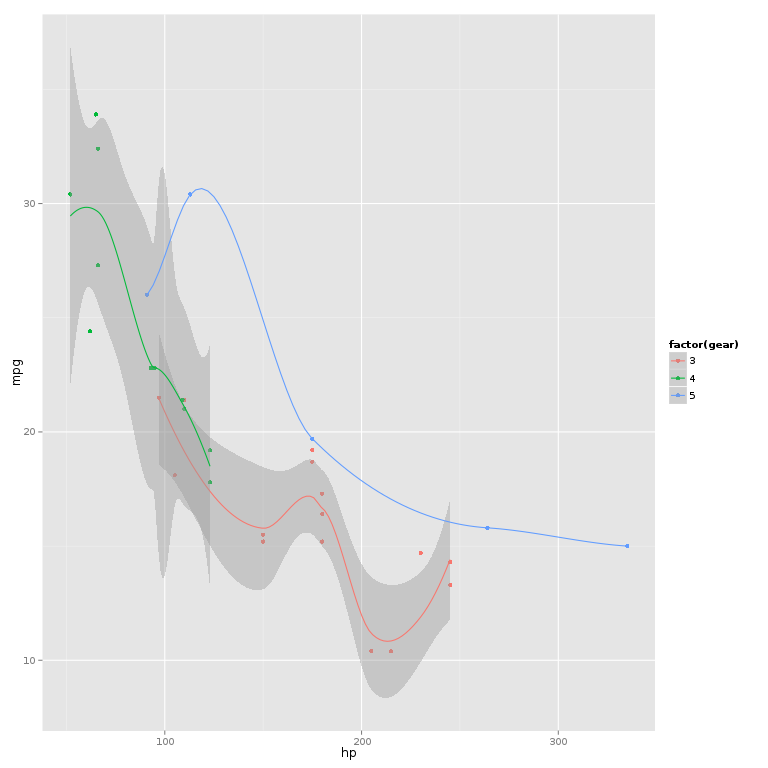

In [76]:
_ = %R --width 768 --height 768 plot(qplot(hp, mpg, color=factor(gear), data=mtcars, geom=c("point", "smooth")))

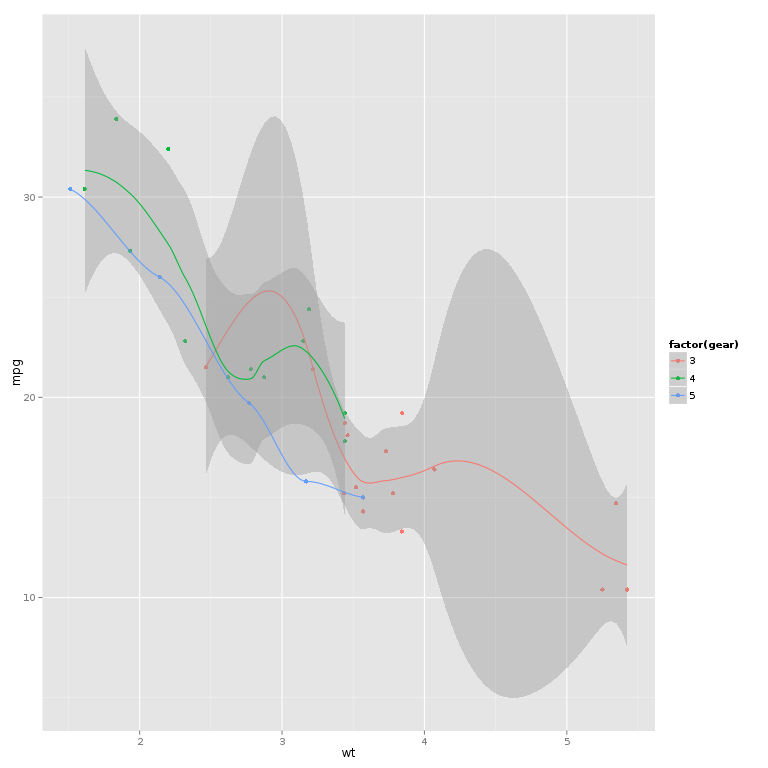

In [77]:
_ = %R --width 768 --height 768 plot(qplot(wt, mpg, color=factor(gear), data=mtcars, geom=c("point", "smooth")))

In [78]:
%%R
mtcars$am     <- as.factor(mtcars$am)
mtcars$cyl    <- as.factor(mtcars$cyl)
mtcars$vs     <- as.factor(mtcars$vs)
mtcars$gear   <- as.factor(mtcars$gear)

In [79]:
%%R
fit <- lm(mpg ~ ., data=mtcars)
summary(fit)


Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2015 -1.2319  0.1033  1.1953  4.3085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 15.09262   17.13627   0.881   0.3895  
cyl6        -1.19940    2.38736  -0.502   0.6212  
cyl8         3.05492    4.82987   0.633   0.5346  
disp         0.01257    0.01774   0.708   0.4873  
hp          -0.05712    0.03175  -1.799   0.0879 .
drat         0.73577    1.98461   0.371   0.7149  
wt          -3.54512    1.90895  -1.857   0.0789 .
qsec         0.76801    0.75222   1.021   0.3201  
vs1          2.48849    2.54015   0.980   0.3396  
am1          3.34736    2.28948   1.462   0.1601  
gear4       -0.99922    2.94658  -0.339   0.7382  
gear5        1.06455    3.02730   0.352   0.7290  
carb         0.78703    1.03599   0.760   0.4568  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.616 on 19 degrees of freedom
Multiple 

In [80]:
%%R
fit2 <- lm(mpg ~ hp + wt + gear, data=mtcars)
summary(fit2)


Call:
lm(formula = mpg ~ hp + wt + gear, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3025 -1.9307 -0.3722  1.0243  5.9784 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.87245    2.58016  13.516 1.56e-13 ***
hp          -0.03497    0.01260  -2.775   0.0099 ** 
wt          -3.23852    0.87782  -3.689   0.0010 ** 
gear4        1.26490    1.34084   0.943   0.3539    
gear5        1.87356    1.86662   1.004   0.3244    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.619 on 27 degrees of freedom
Multiple R-squared:  0.8356,	Adjusted R-squared:  0.8112 
F-statistic:  34.3 on 4 and 27 DF,  p-value: 3.196e-10



In [81]:
%%R
fit3 <- lm(mpg ~ hp + wt, data=mtcars)
summary(fit3)


Call:
lm(formula = mpg ~ hp + wt, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.941 -1.600 -0.182  1.050  5.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.22727    1.59879  23.285  < 2e-16 ***
hp          -0.03177    0.00903  -3.519  0.00145 ** 
wt          -3.87783    0.63273  -6.129 1.12e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.593 on 29 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8148 
F-statistic: 69.21 on 2 and 29 DF,  p-value: 9.109e-12



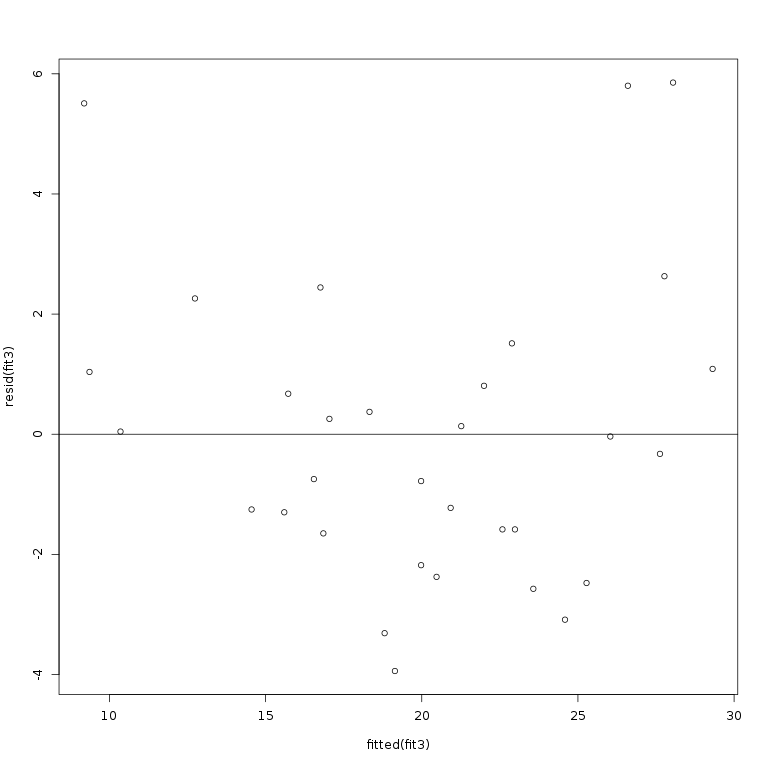

In [82]:
%%R --width 768 --height 768
plot(fitted(fit3), resid(fit3))
abline(h = 0)